# Kunskapskontroll 1 

### Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: Keikiet Pham

Datum då du presenterade ditt arbete på lektionen: 2024-02-21

Presenterade du inte det på lektionen, skriv vem du har diskuterat igenom koden med: 

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Code

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, cross_val_score

from sklearn.datasets import make_regression


## Data Collection

In [10]:
# Read CSV
housing = pd.read_csv('housing.csv')

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Data Preprocessing

In [14]:
# Drop ocean_proximity column
df_housing = housing.drop(['ocean_proximity'], axis = 1)

# Check columns
# df_housing.columns
# df_housing.head()

In [15]:
# Create new dataframes containing features and labels
X = df_housing.drop(['median_house_value'], axis = 1)
y = df_housing[['median_house_value']]
# y.head()
# X.head()

In [16]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## EDA

In [17]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


<AxesSubplot:>

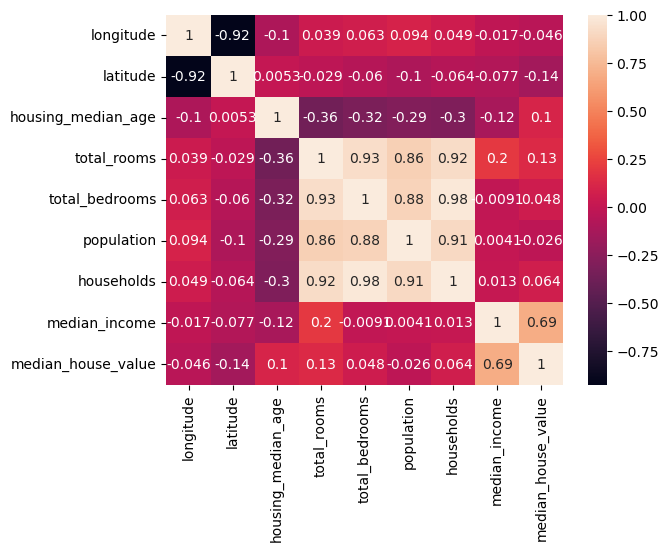

In [18]:
# Create df and plot correlation_matrix
df = X_train.copy()
df['median_house_value'] = y

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [19]:
# Corr_matrix in table format
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [20]:
# Sort correlation values
print(correlation_matrix['median_house_value'].sort_values(ascending=False))
#Are some features actually noises in our dataset?

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64


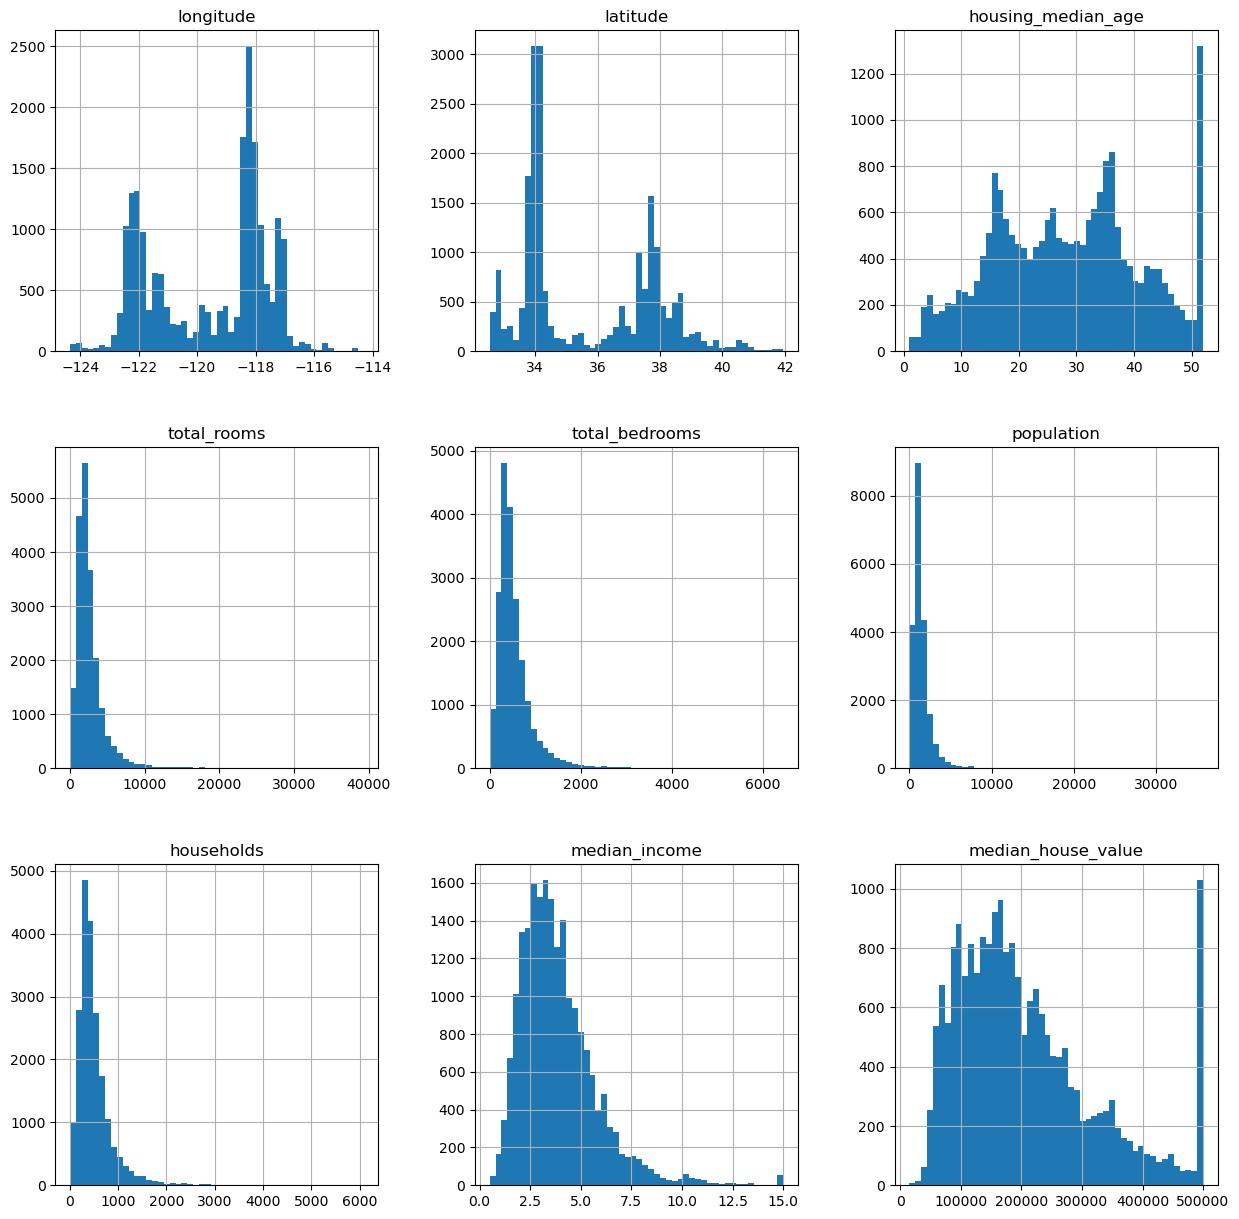

In [21]:
## plot histogram to see distributions
housing.hist(bins=50, figsize=(15, 15))
plt.show()

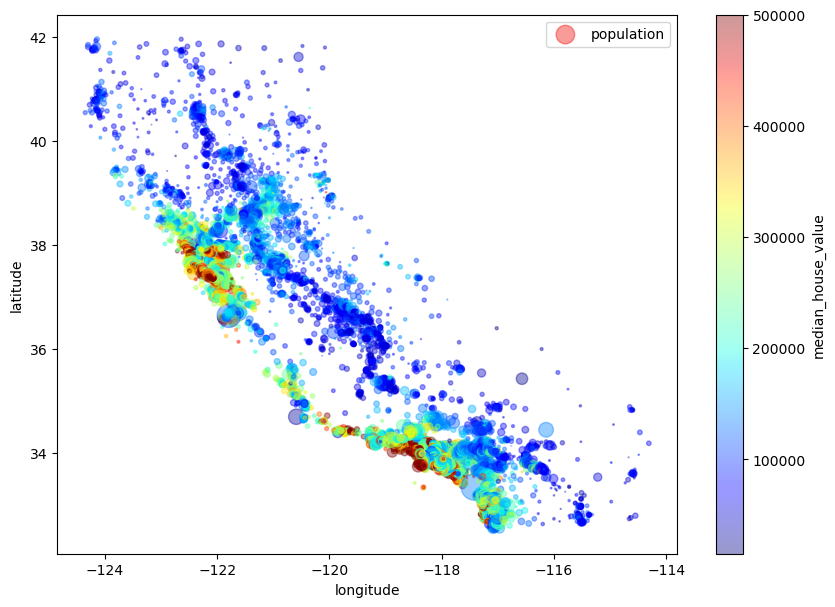

In [22]:
    housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )
    plt.legend()

## Data Re-Preprocessing

In [23]:
# Defining pipeline steps to apply scaler & imputer
steps = [('scaler', MinMaxScaler()),
         ('imputer', SimpleImputer(strategy='median'))]

# Initialize pipeline and fit data
pipeline = Pipeline(steps)
pipeline.fit_transform(X_train)

# Transform test set
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [24]:
# X_train_scaled

In [25]:
# Count the sum of missing values
sum_missing_values = np.sum(np.isnan(X_test_scaled))

# Print the sum of missing values
print("Sum of missing values:", sum_missing_values)

Sum of missing values: 0


## Select and Train Model

In [ ]:
# Introducing Linear Regression model

lin_reg = LinearRegression(fit_intercept = True)
scores_lr = cross_validate(lin_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')['test_score']
print('RMSE for each iteration:', np.sqrt(-scores_lr))
print('RMSE Mean:', np.sqrt(np.mean(-scores_lr)))
print('RMSE STD:', np.std(np.sqrt(-scores_lr)))

In [ ]:
# Introducing Lasso model

lasso = Lasso()
hyper_param_lasso = {'alpha':(45, 47, 50)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)

# Fit the gridsearch to use the best hyperparameter in our cross validation
lasso_reg.fit(X_train_scaled, y_train)

print(lasso_reg.best_params_)
# print(lasso_reg.cv_results_)

scores_lasso = cross_validate(lasso_reg, X_train_scaled, y_train, cv=5, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lasso))
print('RMSE Mean:', np.sqrt(np.mean(-scores_lasso)))
print('RMSE STD:', np.std(np.sqrt(-scores_lasso)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_validate
import numpy as np

# Define the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters for grid search
hyper_param_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]    # Minimum number of samples required to split an internal node
}

# Perform grid search with cross-validation
rf_reg = GridSearchCV(rf, hyper_param_rf, cv=5)

# Flatten y_train if it's not already a 1D array
y_train_flat = np.ravel(y_train)

# Fit the grid search to find the best hyperparameters
rf_reg.fit(X_train_scaled, y_train_flat)

# Print the best hyperparameters found
print(rf_reg.best_params_)

# Calculate cross-validation scores
scores_rf = cross_validate(rf_reg, X_train_scaled, y_train_flat, cv=5, scoring='neg_mean_squared_error')["test_score"]

# Calculate and print RMSE metrics
print('RMSE for each iteration:', np.sqrt(-scores_rf))
print('RMSE Mean:', np.sqrt(np.mean(-scores_rf)))
print('RMSE STD:', np.std(np.sqrt(-scores_rf)))


In [ ]:
## Displaying Feature importance

rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train_scaled, y_train.values.reshape(-1))

# Get feature importances and their corresponding feature names
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame with feature importances and their corresponding feature names
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance (train set)": importances})

# Sort values
feature_importance_df = feature_importance_df.sort_values(by="Importance (train set)", ascending=False)

print(feature_importance_df)

## Evaluating Models

In [ ]:
models = {"Linear Regression": lin_reg, "Lasso": lasso_reg, 'RForestRegressor': rf_reg}
results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'neg_mean_squared_error')
    cv_results = np.sqrt(-cv_results)
    results.append(cv_results)

print(cv_results)
plt.boxplot(results, labels=models.keys())
plt.ylabel('RMSE')
plt.show()

## Test set performance

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_score = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_score))

## Displaying Feature importance

In [ ]:
# Fit the model to the training data
ForReg.fit(X_test_scaled, y_test.values.reshape(-1))

# Get feature importances and their corresponding feature names
importances = ForReg.feature_importances_
feature_names = X_train.columns

# Create a DataFrame with feature importances and their corresponding feature names
feature_importance_df_test = pd.DataFrame({"Feature": feature_names, "Importance (test set)": importances, })

# Sort the DataFrame by importance in descending order and concatenate with corresponding values in tran set
feature_importance_df_test = feature_importance_df_test.drop('Feature', axis = 1)
feature_importance_df_test = pd.concat([feature_importance_df, feature_importance_df_test], axis = 1)

print(feature_importance_df_test)

## Conclusion

Both **LinearRegression** and **Lasso Models** show similar results, 
however Lasso has slightly worse performance when **MinMaxScaler** is used as opposed to **StandardScaler.**
**Feature Importance** on both train & test set show similar result which can indicate that neither train or test is skewed as opposed to one another.
Dispite this both models show mediocre performance. One suggestion is to remove features with low corelation as they can be considered as noise in our models.